### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

Load chromatogram data exported from R

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
chromatograms = ChromatogramCreator(xcms_output)

DEBUG:Chromatograms:Loading 0 chromatograms
../codes\VMSfunctions\Common.py:56: RuntimeWarning:

divide by zero encountered in double_scalars

DEBUG:Chromatograms:Loading 5000 chromatograms
DEBUG:Chromatograms:Loading 10000 chromatograms
DEBUG:Chromatograms:Loading 15000 chromatograms
DEBUG:Chromatograms:Loading 20000 chromatograms
DEBUG:Chromatograms:Loading 25000 chromatograms
DEBUG:Chromatograms:Loading 30000 chromatograms
DEBUG:Chromatograms:Loading 35000 chromatograms
DEBUG:Chromatograms:Loading 40000 chromatograms
DEBUG:Chromatograms:Loading 45000 chromatograms


### Generate some chemicals

In [8]:
hmdb = load_obj('../models/hmdb_compounds.p')

In [9]:
chemicals = ChemicalCreator(ps, chromatograms)

In [10]:
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
sampled_chemicals = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 1000, 2, 'Unknown', 'Empirical', None, False, hmdb)

DEBUG:Chemicals:1000 ms1 peaks to be created.
DEBUG:Chemicals:i = 25 Total = 45
DEBUG:Chemicals:i = 25 Total = 46
DEBUG:Chemicals:i = 50 Total = 75
DEBUG:Chemicals:i = 75 Total = 106
DEBUG:Chemicals:i = 100 Total = 145
DEBUG:Chemicals:i = 125 Total = 176
DEBUG:Chemicals:i = 125 Total = 177
DEBUG:Chemicals:i = 125 Total = 178
DEBUG:Chemicals:i = 150 Total = 210
DEBUG:Chemicals:i = 175 Total = 241
DEBUG:Chemicals:i = 200 Total = 275
DEBUG:Chemicals:i = 225 Total = 305
DEBUG:Chemicals:i = 250 Total = 335
DEBUG:Chemicals:i = 275 Total = 364
DEBUG:Chemicals:i = 275 Total = 365
DEBUG:Chemicals:i = 300 Total = 395
DEBUG:Chemicals:i = 300 Total = 396
DEBUG:Chemicals:i = 325 Total = 425
DEBUG:Chemicals:i = 350 Total = 460
DEBUG:Chemicals:i = 375 Total = 494
DEBUG:Chemicals:i = 400 Total = 533
DEBUG:Chemicals:i = 425 Total = 562
DEBUG:Chemicals:i = 450 Total = 596
DEBUG:Chemicals:i = 475 Total = 633
DEBUG:Chemicals:i = 500 Total = 664
DEBUG:Chemicals:i = 525 Total = 695
DEBUG:Chemicals:i = 550 T

UnknownChemical mz=306.9911 rt=477.50 max_intensity=389234.74
[297355.75      315220.46875   389230.125     346175.25
 370486.4375    273809.09375   203863.203125  103894.9921875]


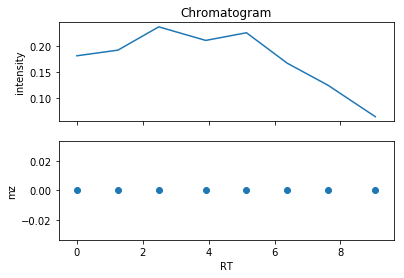

UnknownChemical mz=131.7710 rt=1015.21 max_intensity=434151.15
[109101.578125   85034.359375  434178.1875    393113.125
 259579.390625  353381.21875   376930.625     120930.2890625
 197707.21875  ]


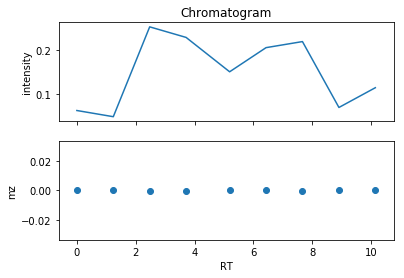

UnknownChemical mz=365.5668 rt=1246.95 max_intensity=1864522.74
[ 471450.9375   501568.46875  813146.4375  1168022.      1330905.75
 1262392.125   1643077.875   1864358.25    1786332.     ]


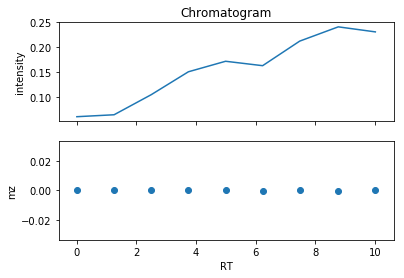

UnknownChemical mz=223.7067 rt=891.73 max_intensity=3544595.89
[2671088.5  2569656.5  3224523.5  3545627.5  2871099.   3101478.5
 3303396.75 2917891.75 2906245.   2925812.   2785037.5 ]


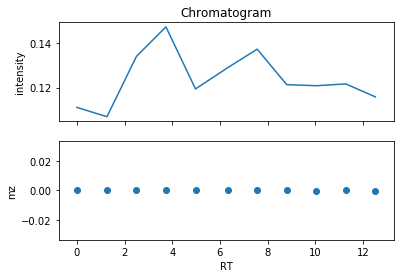

UnknownChemical mz=285.6769 rt=1072.88 max_intensity=338490.58
[ 64487.02734375 162844.6875     338465.         332467.65625
 268457.625      273624.125      307697.3125     310221.09375
  93033.1875     111953.4140625 ]


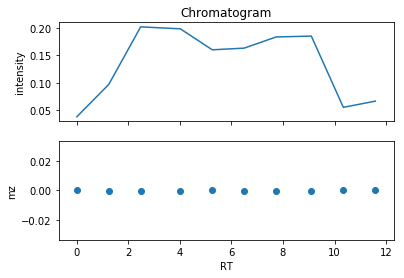

UnknownChemical mz=308.8821 rt=687.79 max_intensity=3732149.60
[2139186.75 2174454.   2730868.75 3055490.75 3594275.75 3440752.75
 3730567.   3249399.75 3190579.25 3223846.   3173904.   2625311.25
 2759183.  ]


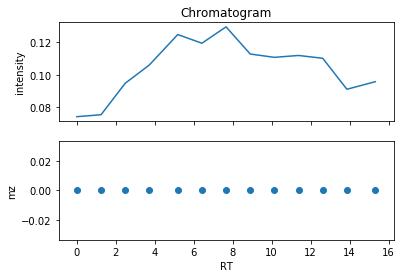

UnknownChemical mz=305.6809 rt=550.65 max_intensity=2560558.06
[ 932453.125  1021001.625  1039516.1875 1148772.625  1172557.875
 1820573.875  2269526.75   2208270.25   2247651.75   2560831.
 2548652.25   2302725.     2362178.75  ]


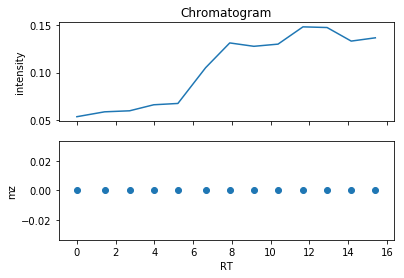

UnknownChemical mz=409.8380 rt=991.35 max_intensity=234604.33
[ 75355.7890625 140357.890625  220103.03125   204306.484375
 234612.96875   204604.609375  192757.328125  107857.140625
  69245.2421875 102058.1171875]


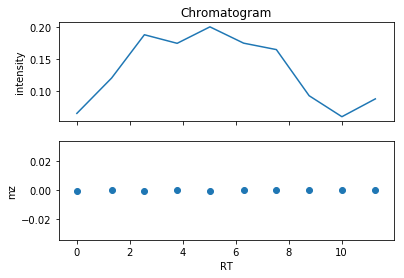

UnknownChemical mz=267.5640 rt=893.20 max_intensity=1092722.42
[ 200565.46875   231374.171875  267160.90625   673806.6875
 1092564.5      1078888.      ]


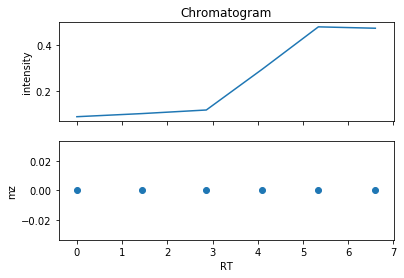

UnknownChemical mz=140.4116 rt=916.66 max_intensity=351347.75
[195209.5        178171.609375   175626.578125   138502.734375
 158424.046875   161185.265625   184847.875      191707.28125
 176282.28125    267957.75       237828.359375   216300.453125
 252442.296875   163901.828125   222055.625      233937.9375
 224022.796875   235318.15625    177538.8125     159582.78125
 210668.046875   288057.375      301351.03125    328536.3125
 253808.375      279863.21875    306720.28125    301389.65625
 261149.40625    253409.125      243052.84375    273729.4375
 288279.0625     351311.90625    278280.         133891.21875
  66426.484375    75234.625       42058.9921875   43063.46484375
  58197.734375    89107.140625    87466.9453125  164977.953125
 169320.         102154.59375    137366.171875    93777.3828125
 124030.546875  ]


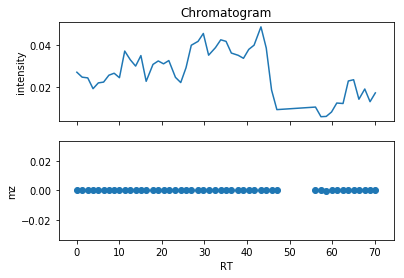

In [11]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in sampled_chemicals[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

### Set up a simple MS1 controller

In [24]:
max_rt = 200

In [25]:
mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)

set_log_level_info()
controller.make_plot = False

# set_log_level_debug()
# controller.make_plot = True

controller.run(max_rt)

INFO:SimpleMs1Controller:Acquisition open
INFO:SimpleMs1Controller:Received Scan 1416 num_peaks=1 rt=181.68 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1417 num_peaks=1 rt=181.73 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1418 num_peaks=1 rt=181.79 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1419 num_peaks=1 rt=181.87 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1420 num_peaks=1 rt=181.94 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1421 num_peaks=1 rt=182.01 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1422 num_peaks=1 rt=182.34 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1423 num_peaks=1 rt=182.45 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1424 num_peaks=1 rt=182.54 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1425 num_peaks=1 rt=182.70 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1426 num_peaks=1 rt=182.87 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1427 num_peaks=1 rt=183.04 ms_level=1
INFO:SimpleMs1Controller:Received 

INFO:SimpleMs1Controller:Received Scan 1522 num_peaks=8 rt=195.44 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1523 num_peaks=8 rt=195.56 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1524 num_peaks=7 rt=195.64 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1525 num_peaks=7 rt=195.71 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1526 num_peaks=7 rt=195.80 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1527 num_peaks=7 rt=195.97 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1528 num_peaks=7 rt=196.04 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1529 num_peaks=7 rt=196.11 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1530 num_peaks=7 rt=196.18 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1531 num_peaks=8 rt=196.24 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1532 num_peaks=8 rt=196.32 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1533 num_peaks=8 rt=196.41 ms_level=1
INFO:SimpleMs1Controller:Received Scan 1534 num_peaks=8 rt=196.78 ms_level=1

In [26]:
controller.write_mzML('my_analysis', '../models/out.mzML')

### Set up a Top-N controller

In [27]:
max_rt = 200                    # the maximum retention time of scans to generate
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 15                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

In [28]:
mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)

set_log_level_info()
controller.make_plot = False

# set_log_level_debug()
# controller.make_plot = True

controller.run(max_rt)

INFO:TopNController:Acquisition open
INFO:TopNController:Received Scan 1429 num_peaks=1 rt=181.73 ms_level=1
INFO:TopNController:Received Scan 1430 num_peaks=10 rt=181.79 ms_level=2
INFO:TopNController:Received Scan 1431 num_peaks=1 rt=181.94 ms_level=1
INFO:TopNController:Received Scan 1432 num_peaks=1 rt=182.01 ms_level=1
INFO:TopNController:Received Scan 1433 num_peaks=1 rt=182.08 ms_level=1
INFO:TopNController:Received Scan 1434 num_peaks=1 rt=182.16 ms_level=1
INFO:TopNController:Received Scan 1435 num_peaks=1 rt=182.22 ms_level=1
INFO:TopNController:Received Scan 1436 num_peaks=1 rt=182.29 ms_level=1
INFO:TopNController:Received Scan 1437 num_peaks=1 rt=182.61 ms_level=1
INFO:TopNController:Received Scan 1438 num_peaks=1 rt=182.69 ms_level=1
INFO:TopNController:Received Scan 1439 num_peaks=1 rt=182.85 ms_level=1
INFO:TopNController:Received Scan 1440 num_peaks=1 rt=182.92 ms_level=1
INFO:TopNController:Received Scan 1441 num_peaks=1 rt=183.09 ms_level=1
INFO:TopNController:Receiv

INFO:TopNController:Received Scan 1543 num_peaks=9 rt=197.39 ms_level=1
INFO:TopNController:Received Scan 1544 num_peaks=9 rt=197.74 ms_level=1
INFO:TopNController:Received Scan 1545 num_peaks=9 rt=197.80 ms_level=1
INFO:TopNController:Received Scan 1546 num_peaks=10 rt=198.17 ms_level=1
INFO:TopNController:Received Scan 1547 num_peaks=10 rt=198.25 ms_level=2
INFO:TopNController:Received Scan 1548 num_peaks=9 rt=198.39 ms_level=1
INFO:TopNController:Received Scan 1549 num_peaks=9 rt=198.46 ms_level=1
INFO:TopNController:Received Scan 1550 num_peaks=9 rt=198.56 ms_level=1
INFO:TopNController:Received Scan 1551 num_peaks=8 rt=198.73 ms_level=1
INFO:TopNController:Received Scan 1552 num_peaks=10 rt=198.90 ms_level=2
INFO:TopNController:Received Scan 1553 num_peaks=9 rt=199.18 ms_level=1
INFO:TopNController:Received Scan 1554 num_peaks=10 rt=199.24 ms_level=2
INFO:TopNController:Received Scan 1555 num_peaks=9 rt=199.38 ms_level=1
INFO:TopNController:Received Scan 1556 num_peaks=10 rt=199.5

In [29]:
controller.write_mzML('my_analysis', '../models/out.mzML')

### Set up a DIA controller

In [30]:
max_rt = 200
dia_design = "basic"
window_type = "even"
kaufmann_design = None
extra_bins = 0
num_windows = 10

In [31]:
mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals, density=ps.density_estimator)
controller = TreeController(mass_spec, dia_design, window_type, kaufmann_design, extra_bins, num_windows)

set_log_level_info()
controller.make_plot = False

# set_log_level_debug()
# controller.make_plot = True

controller.run(max_rt)

INFO:TreeController:Acquisition open
INFO:TreeController:Received MS1 scan Scan 1408 num_peaks=1 rt=181.68 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1411 num_peaks=10 rt=182.32 ms_level=2
INFO:TreeController:Received MS1 scan Scan 1419 num_peaks=3 rt=183.84 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1421 num_peaks=10 rt=184.24 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1422 num_peaks=20 rt=184.37 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1423 num_peaks=20 rt=184.46 ms_level=2
INFO:TreeController:Received MS1 scan Scan 1430 num_peaks=5 rt=185.70 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1432 num_peaks=10 rt=186.14 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1433 num_peaks=20 rt=186.21 ms_level=2
INFO:TreeController:Received MS2 scan Scan 1434 num_peaks=20 rt=186.49 ms_level=2
INFO:TreeController:Received MS1 scan Scan 1441 num_peaks=7 rt=187.64 ms_level=1
INFO:TreeController:Received MS2 scan Scan 1443 num_peaks=30 rt=1

In [32]:
controller.write_mzML('my_analysis', '../models/out.mzML')